In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense,SimpleRNN,Input,Bidirectional
import tensorflow_datasets as tfds
from keras.models import Model

# from datasets import load_dataset

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset


 # Loading the dataset

In [ ]:
dataset = load_dataset('ag_news')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7600
    })
})

In [ ]:
ds_train = dataset['train']
ds_test = dataset['test']

In [ ]:
print(ds_train[1])

{'text': 'Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\\which has a reputation for making well-timed and occasionally\\controversial plays in the defense industry, has quietly placed\\its bets on another part of the market.', 'label': 2}


In [ ]:
text_train = [item['text']for item in ds_train]
label_train = [item['label']for item in ds_train]

In [ ]:
text_test = [item['text']for item in ds_test]
label_test = [item['label']for item in ds_test]

 # Text preprocessing

In [ ]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(text_train)
sequences_train = tokenizer.texts_to_sequences(text_train)
sequences_test = tokenizer.texts_to_sequences(text_test)

In [ ]:
max_len = 100
x_train = pad_sequences(sequences_train,maxlen=max_len,padding='post')
x_test = pad_sequences(sequences_test,maxlen=max_len,padding='post')

In [ ]:
x_train

array([[ 442,  441, 1681, ...,    0,    0,    0],
       [1099,  877, 1303, ...,    0,    0,    0],
       [  53,    6,  376, ...,    0,    0,    0],
       ...,
       [7887,   59,  672, ...,    0,    0,    0],
       [4290,  781,  232, ...,    0,    0,    0],
       [2330,  225, 2514, ...,    0,    0,    0]], dtype=int32)

In [ ]:
y_train = np.array(label_train)
y_test = np.array(label_test)

In [ ]:
y_train

array([2, 2, 2, ..., 1, 1, 1])

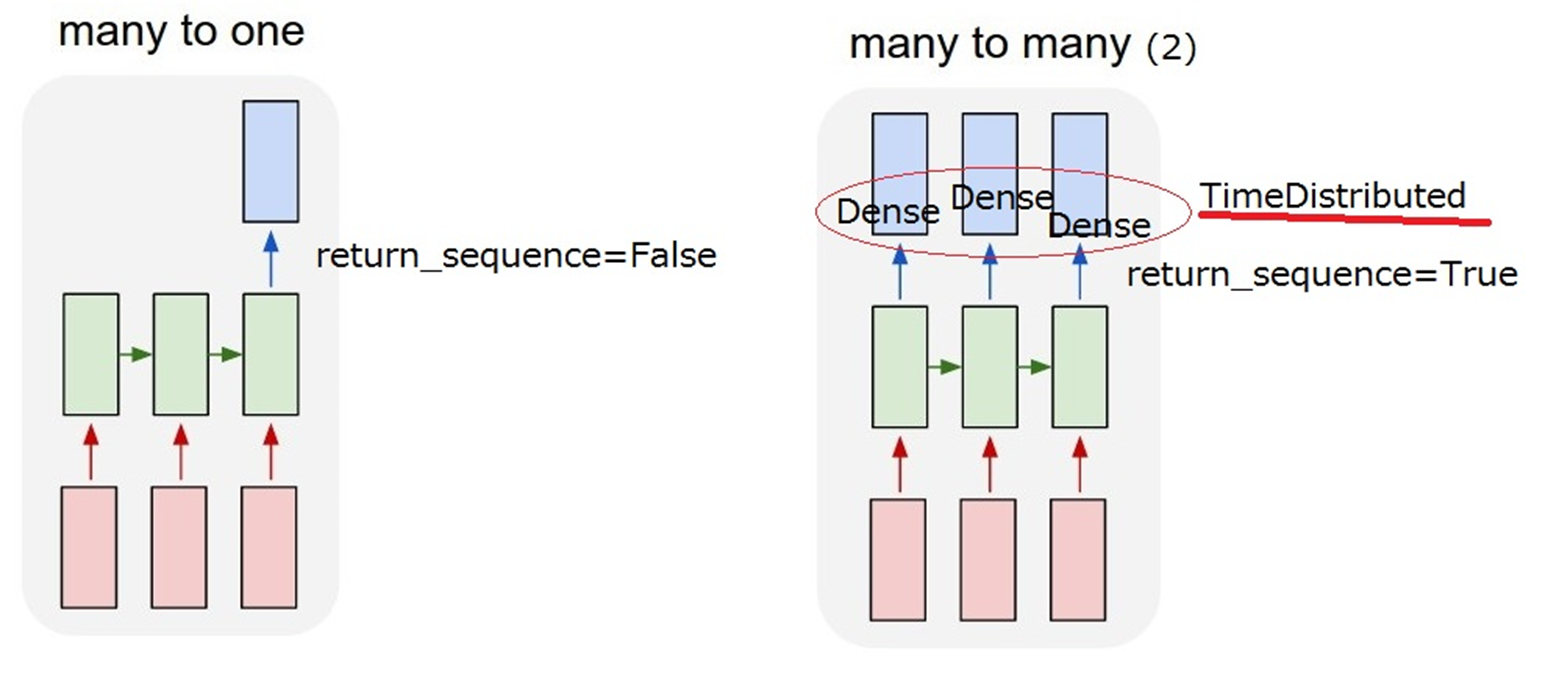

In [ ]:
embedding_dim = 128

 # Building the model

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=10000,output_dim=embedding_dim,input_length=max_len))
model.add(SimpleRNN(64,return_sequences=False))
model.add(Dense(4,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


 # Trainning the model

In [ ]:
history = model.fit(x_train,y_train,epochs=5,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.5633 - loss: 1.0755 - val_accuracy: 0.6488 - val_loss: 0.9726
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 92s 98ms/step - accuracy: 0.7083 - loss: 0.8536 - val_accuracy: 0.7279 - val_loss: 0.8163
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 133s 89ms/step - accuracy: 0.7571 - loss: 0.7407 - val_accuracy: 0.7589 - val_loss: 0.7353
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 133s 80ms/step - accuracy: 0.8011 - loss: 0.6288 - val_accuracy: 0.7953 - val_loss: 0.6322
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 82ms/step - accuracy: 0.8265 - loss: 0.5504 - val_accuracy: 0.8129 - val_loss: 0.5959


 # Evaluating the model

In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)
print(f'test loss : {loss}')
print(f'test accuarcy : {accuracy}')

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8068 - loss: 0.6147
test loss : 0.5958738327026367
test accuarcy : 0.8128947615623474


In [ ]:
model.predict(x_test)

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


array([[0.02388871, 0.00115507, 0.05645888, 0.9184974 ],
       [0.09222731, 0.8536838 , 0.03145155, 0.02263739],
       [0.0352383 , 0.00216513, 0.06343311, 0.8991634 ],
       ...,
       [0.03199034, 0.9582512 , 0.00507433, 0.00468421],
       [0.04560255, 0.00904808, 0.31116974, 0.6341796 ],
       [0.0445925 , 0.01139157, 0.5636145 , 0.38040152]], dtype=float32)

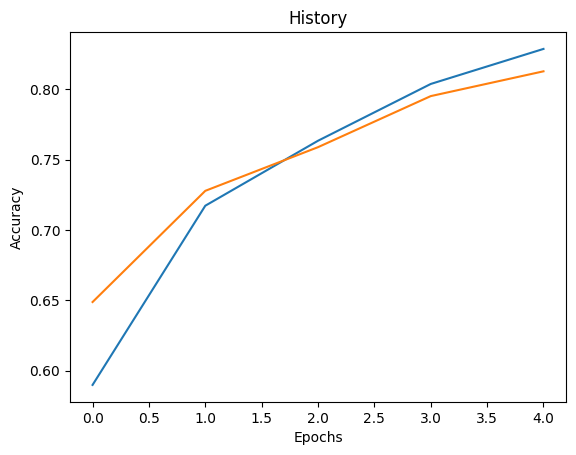

In [ ]:
# Plot the accuracy
import matplotlib.pyplot as plt

fig = plt.plot(history.history['accuracy'])
fig = plt.plot(history.history['val_accuracy'])
title = plt.title("History")
xlabel = plt.xlabel("Epochs")
ylabel = plt.ylabel("Accuracy")


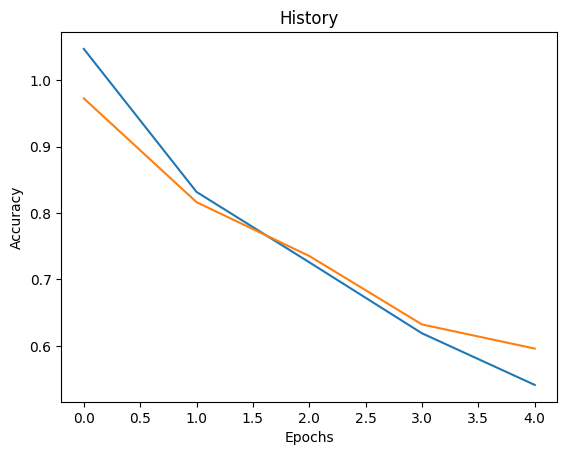

In [ ]:
# Plot the accuracy
import matplotlib.pyplot as plt

fig = plt.plot(history.history['loss'])
fig = plt.plot(history.history['val_loss'])
title = plt.title("History")
xlabel = plt.xlabel("Epochs")
ylabel = plt.ylabel("Accuracy")


 # Trying another model using Bidirectional RNN

In [ ]:
input = Input(shape=(None,))
embedding = Embedding(input_dim=10000,output_dim=embedding_dim,input_length=max_len)(input)
Rnn1 = Bidirectional(SimpleRNN(64,return_sequences=True))(embedding)
Rnn2 = Bidirectional(SimpleRNN(64))(Rnn1)
output = Dense(4,activation=('softmax'))(Rnn2)
model2 = Model(inputs=input,outputs=output)

model2.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
history = model2.fit(x_train,y_train,epochs=5,batch_size=256,validation_data=(x_test,y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 249s 529ms/step - accuracy: 0.7074 - loss: 0.6942 - val_accuracy: 0.9053 - val_loss: 0.2890
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 266s 539ms/step - accuracy: 0.9334 - loss: 0.2034 - val_accuracy: 0.9080 - val_loss: 0.2788
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 259s 532ms/step - accuracy: 0.9572 - loss: 0.1297 - val_accuracy: 0.9021 - val_loss: 0.3014
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 253s 538ms/step - accuracy: 0.9743 - loss: 0.0786 - val_accuracy: 0.8949 - val_loss: 0.3663
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 262s 538ms/step - accuracy: 0.9863 - loss: 0.0441 - val_accuracy: 0.8878 - val_loss: 0.4549
